confusion matrix, accuracy, auc-roc socre Random Forest (feature importance)-Caroline Lun

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BU MSBA /BA 780/Team8_Project Folder/dataset_ML.csv")

In [ ]:
df.head()

,Unnamed: 0,city_development_index,experience,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Phd,education_level_Undergraduate,cdi_bucket_medium_human_development,cdi_bucket_high_human_development,cdi_bucket_very_high_human_development,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Startup Company,company_type_Unknown,major_STEM
0,0,0.920,21,1,36,1.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
1,1,0.776,15,5,47,0.0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1
2,4,0.767,21,4,8,0.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,7,0.762,13,5,18,1.0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
4,8,0.920,7,1,46,1.0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.head()

,city_development_index,experience,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Phd,education_level_Undergraduate,cdi_bucket_medium_human_development,cdi_bucket_high_human_development,cdi_bucket_very_high_human_development,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Startup Company,company_type_Unknown,major_STEM
0,0.920,21,1,36,1.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
1,0.776,15,5,47,0.0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1
2,0.767,21,4,8,0.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,0.762,13,5,18,1.0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
4,0.920,7,1,46,1.0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1


Feature Importance

In [ ]:
y = df.target
X = df.drop(columns=['target'])



In [ ]:
X

,city_development_index,experience,last_new_job,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Phd,education_level_Undergraduate,cdi_bucket_medium_human_development,cdi_bucket_high_human_development,cdi_bucket_very_high_human_development,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Startup Company,company_type_Unknown,major_STEM
0,0.920,21,1,36,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
1,0.776,15,5,47,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1
2,0.767,21,4,8,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,0.762,13,5,18,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
4,0.920,7,1,46,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,0.920,10,3,23,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1
12473,0.920,7,1,25,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
12474,0.878,14,1,42,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
12475,0.920,14,4,52,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2020)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

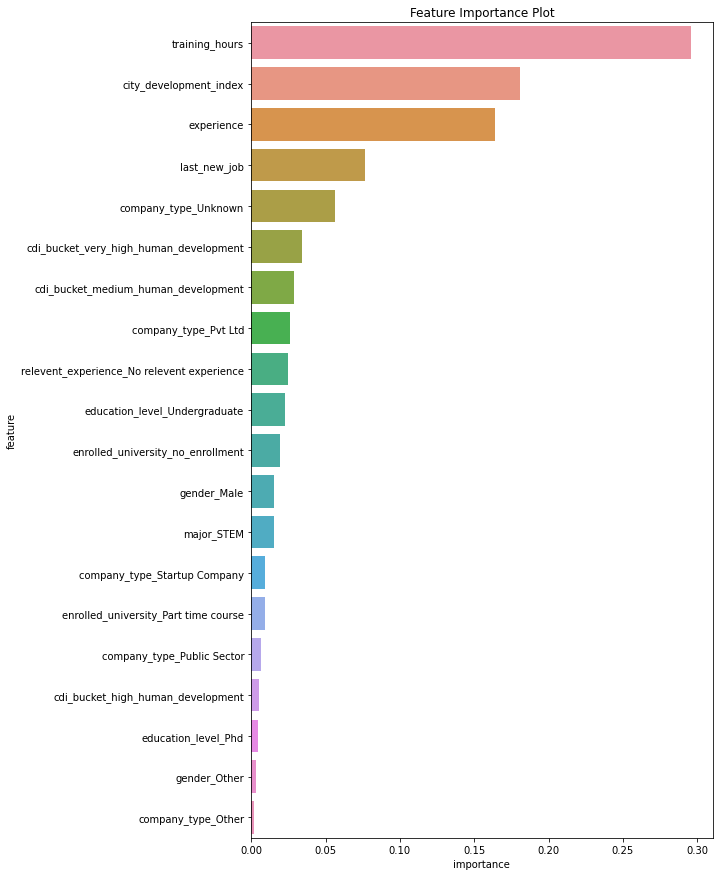

In [ ]:
feature_importance = pd.DataFrame({'feature':X.columns, 'importance':rfc.feature_importances_}).sort_values('importance',ascending=False).reset_index().drop(columns='index')
fig, ax = plt.subplots()
fig.set_size_inches(8.27,15)
plt.title('Feature Importance Plot')
sns.barplot(x='importance',y='feature',ax=ax,data=feature_importance[:50])

In [ ]:
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1912
         1.0       0.54      0.39      0.46       584

    accuracy                           0.78      2496
   macro avg       0.69      0.65      0.66      2496
weighted avg       0.76      0.78      0.77      2496



In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_rfc = rfc.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_rfc))

from sklearn.metrics import classification_report
y_estimate_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_estimate_rfc))

0.7604266671920673
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1912
         1.0       0.54      0.39      0.46       584

    accuracy                           0.78      2496
   macro avg       0.69      0.65      0.66      2496
weighted avg       0.76      0.78      0.77      2496



In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("specificity", specificity, "sensitivity", sensitivity )

specificity 0.8985355648535565 sensitivity 0.3938356164383562


0.7604266671920673
[0.00000000e+00 0.00000000e+00 5.23012552e-04 5.23012552e-04
 1.56903766e-03 3.13807531e-03 3.13807531e-03 3.66108787e-03
 3.66108787e-03 5.23012552e-03 6.79916318e-03 6.79916318e-03
 7.32217573e-03 8.36820084e-03 8.36820084e-03 9.41422594e-03
 9.93723849e-03 1.15062762e-02 1.20292887e-02 1.30753138e-02
 1.46443515e-02 1.62133891e-02 1.67364017e-02 1.77824268e-02
 1.93514644e-02 1.98744770e-02 1.98744770e-02 2.14435146e-02
 2.14435146e-02 2.30125523e-02 2.35355649e-02 2.45815900e-02
 2.51046025e-02 2.61506276e-02 2.61506276e-02 2.71966527e-02
 2.71966527e-02 2.82426778e-02 2.98117155e-02 2.98117155e-02
 3.19037657e-02 3.66108787e-02 3.66108787e-02 4.02719665e-02
 4.02719665e-02 4.55020921e-02 4.60251046e-02 4.60251046e-02
 4.81171548e-02 5.33472803e-02 5.38702929e-02 5.38702929e-02
 5.59623431e-02 6.01464435e-02 6.38075314e-02 6.43305439e-02
 6.69456067e-02 6.95606695e-02 7.26987448e-02 7.63598326e-02
 7.63598326e-02 7.94979079e-02 8.15899582e-02 8.15899582e-02
 8.57

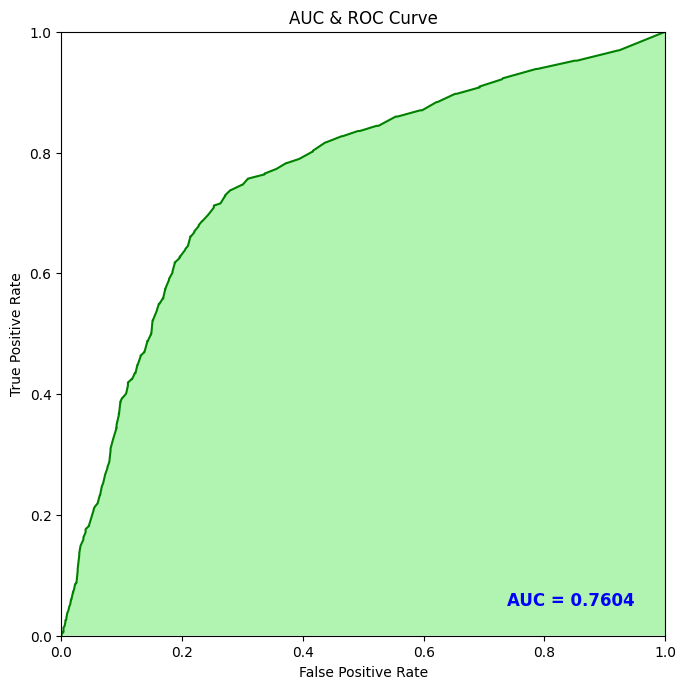

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_rfc)
print(auc)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_rfc)
print(false_positive_rate,true_positive_rate)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()